# **Plot skin friction *Cf* for the data-driven solver at *Re* = 6e6**

The following scenarios are investigated:

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall (velocity & y+ blending)

4. Data-driven wall function with additional correction at the first face (velocity & y+ blending)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 30.0
nuInf = 1.0e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '20', '30', '50']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'flatPlate_Re6e6/turbulentFlatPlate_SA_noWallFunc_Re6e6/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-11.46060,-0.289138,0
1,0.001458,-4.98584,-0.002701,0
2,0.002433,-3.76214,-0.000563,0
3,0.003410,-3.30658,-0.000248,0
4,0.004390,-3.02756,-0.000153,0


In [4]:
tauw_path_wall = [run + 'flatPlate_Re6e6/turbulentFlatPlate_SA_withWallFunc_Re6e6/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-11.46060,-0.289138,0
1,0.001458,-4.98584,-0.002701,0
2,0.002433,-3.76213,-0.000563,0
3,0.003410,-3.30658,-0.000248,0
4,0.004390,-3.02756,-0.000153,0


In [5]:
tauw_path_ddwall = [run + 'flatPlate_Re6e6/turbulentFlatPlate_Re6e6_wallCorr/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.000001,1.0,1.000006,0.00001,0.00001,181244.440802,171851.264410,5.795806e-11,1.145324e+06,...,-0.288548,0.025458,0.728993,0.009194,1.429834,0.018298,16.155924,16.154377,-0.003191,0.004161
1,0.001458,0.000001,1.0,1.000001,0.00001,0.00001,126276.882033,130796.352957,1.200982e-11,4.984007e+05,...,-0.003873,0.011075,0.317255,0.000105,0.634280,0.000379,-0.287238,-0.284574,-0.003191,-0.010389
2,0.002433,0.000001,1.0,1.000001,0.00001,0.00001,120442.636067,125392.959925,7.225547e-12,3.761105e+05,...,-0.000816,0.008358,0.239412,0.000022,0.478969,0.000082,3.700877,3.701483,-0.003191,-0.013140
3,0.003410,0.000001,1.0,1.000001,0.00001,0.00001,118317.233930,123360.990836,5.635519e-12,3.306029e+05,...,-0.000358,0.007347,0.210444,0.000009,0.420880,0.000036,3.187246,3.187513,-0.003191,-0.014164
4,0.004390,0.000001,1.0,1.000000,0.00001,0.00001,117015.054109,122111.325486,4.791877e-12,3.027215e+05,...,-0.000222,0.006727,0.192696,0.000006,0.385412,0.000022,3.508125,3.508290,-0.003191,-0.014791


In [6]:
tauw_path_ddface = [run + 'flatPlate_Re6e6/turbulentFlatPlate_Re6e6_faceCorr/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.000001,1.0,1.000006,0.00001,0.00001,181244.438459,171851.262678,5.575174e-11,1.145324e+06,...,-0.288548,0.025458,0.728993,0.009194,1.429834,0.018298,16.155965,16.154418,-0.003191,0.004161
1,0.001458,0.000001,1.0,1.000001,0.00001,0.00001,126276.881905,130796.352845,1.110455e-11,4.984007e+05,...,-0.003873,0.011075,0.317255,0.000105,0.634281,0.000379,-0.287197,-0.284533,-0.003191,-0.010389
2,0.002433,0.000001,1.0,1.000001,0.00001,0.00001,120442.635934,125392.959798,6.616877e-12,3.761105e+05,...,-0.000816,0.008358,0.239412,0.000022,0.478969,0.000082,3.700918,3.701524,-0.003191,-0.013140
3,0.003410,0.000001,1.0,1.000001,0.00001,0.00001,118317.233793,123360.990705,5.133166e-12,3.306029e+05,...,-0.000358,0.007347,0.210444,0.000009,0.420880,0.000036,3.187287,3.187554,-0.003191,-0.014164
4,0.004390,0.000001,1.0,1.000000,0.00001,0.00001,117015.053960,122111.325343,4.352267e-12,3.027215e+05,...,-0.000222,0.006727,0.192696,0.000006,0.385412,0.000022,3.508166,3.508331,-0.003191,-0.014791


In [7]:
x0 = 0
Rex = np.array((tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf)
Cf_nowall = np.array([np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_wall = np.array([np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddwall = np.array([tauw_data_ddwall[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddface = np.array([tauw_data_ddface[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

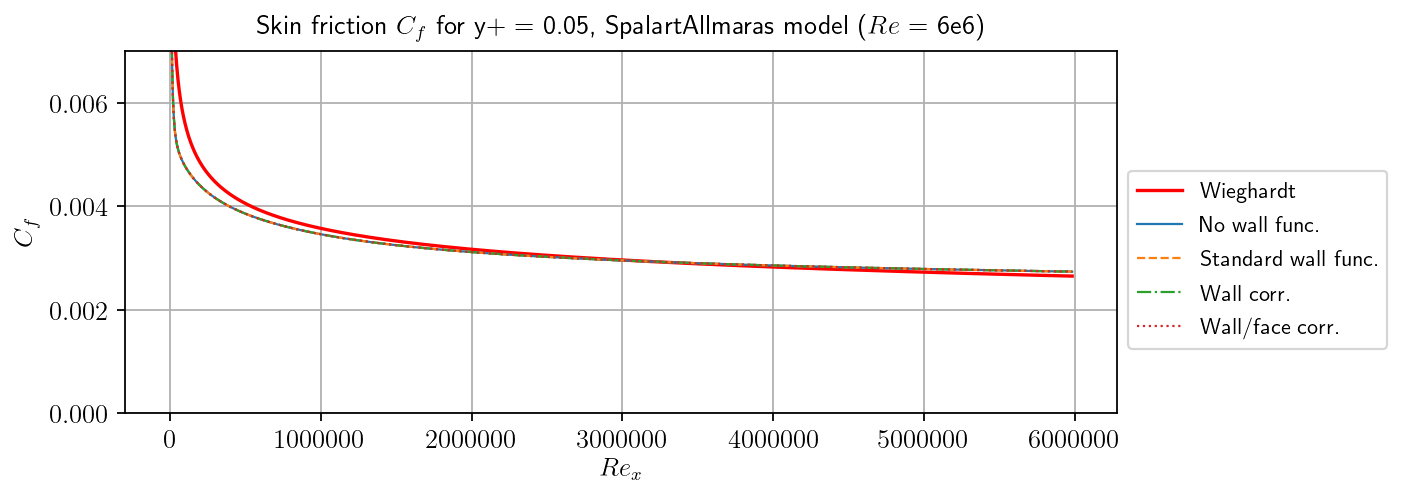

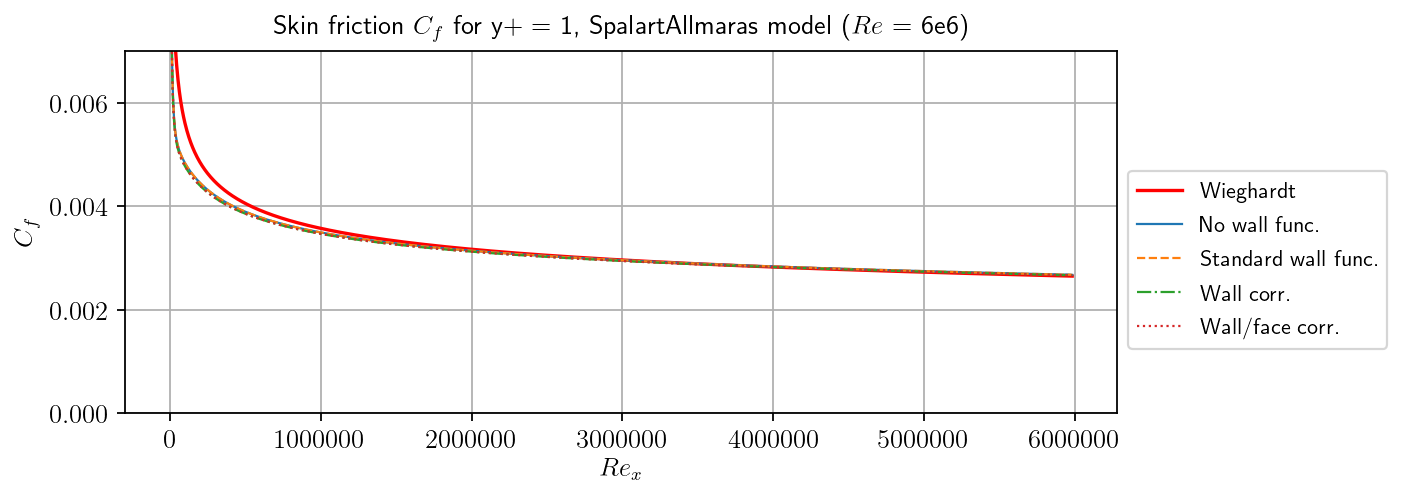

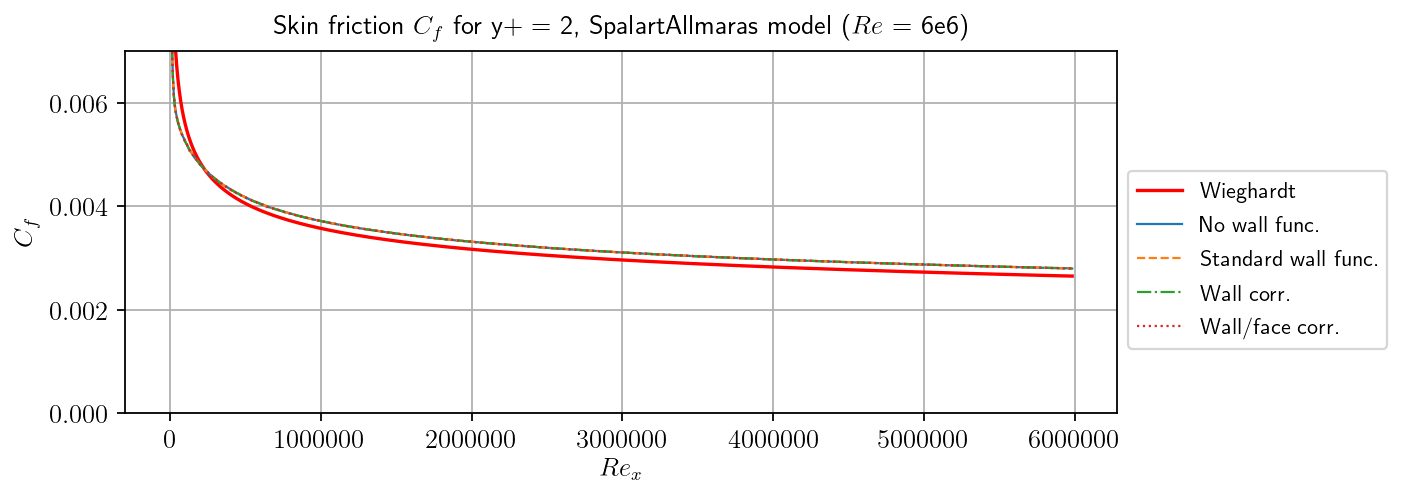

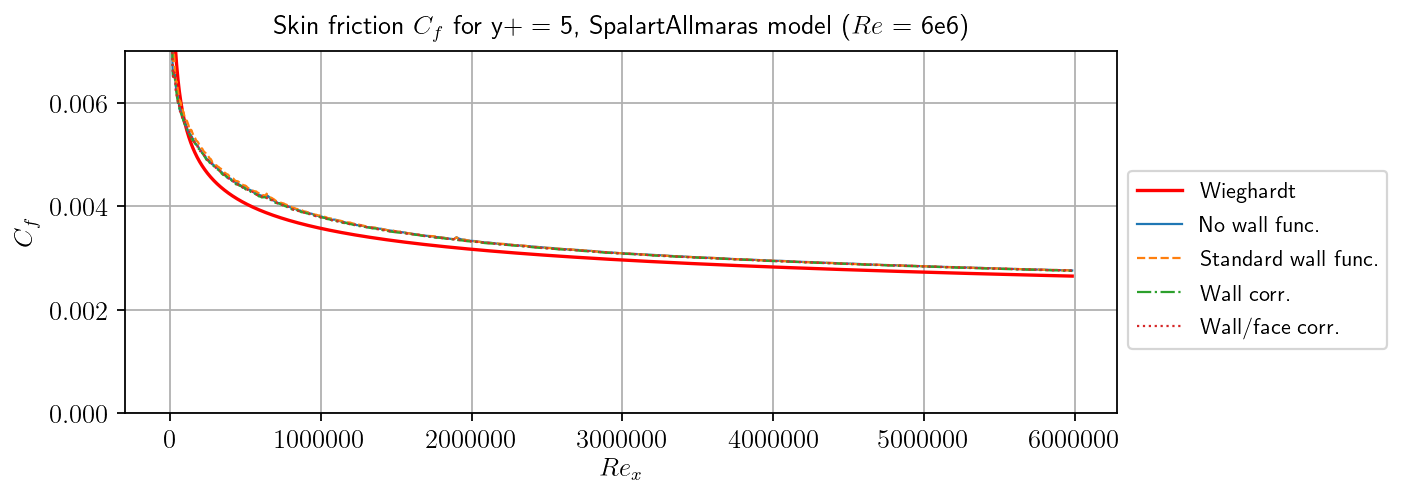

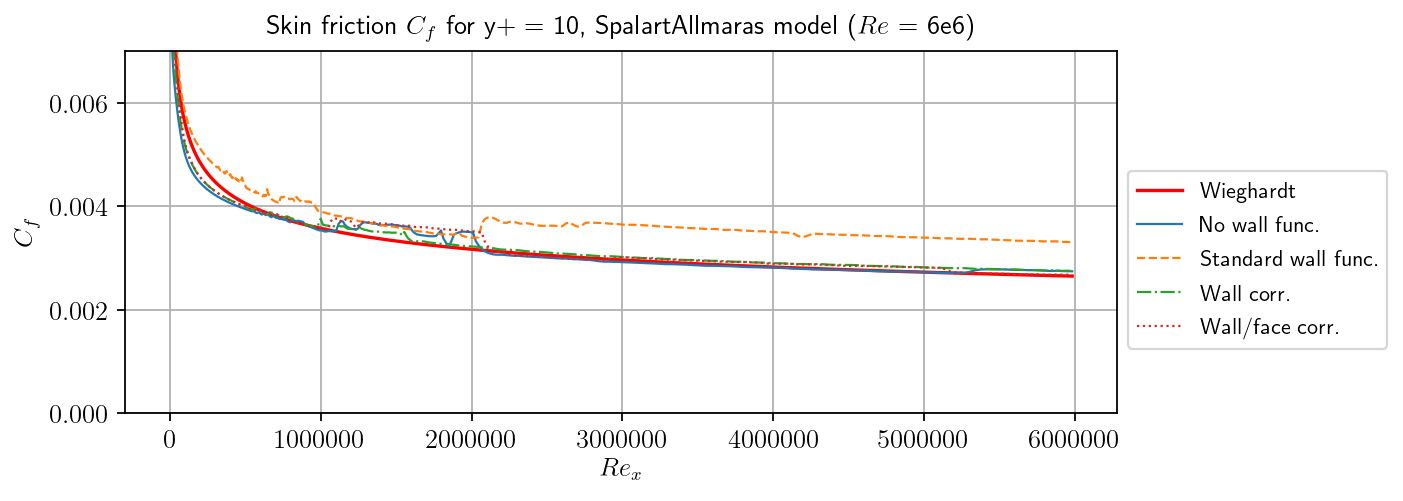

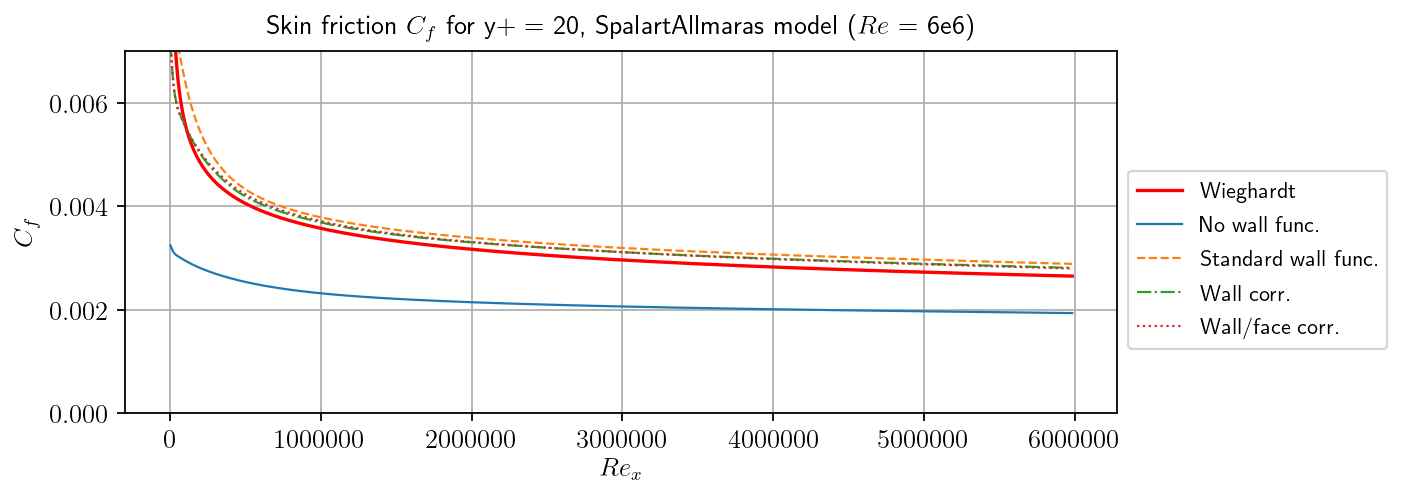

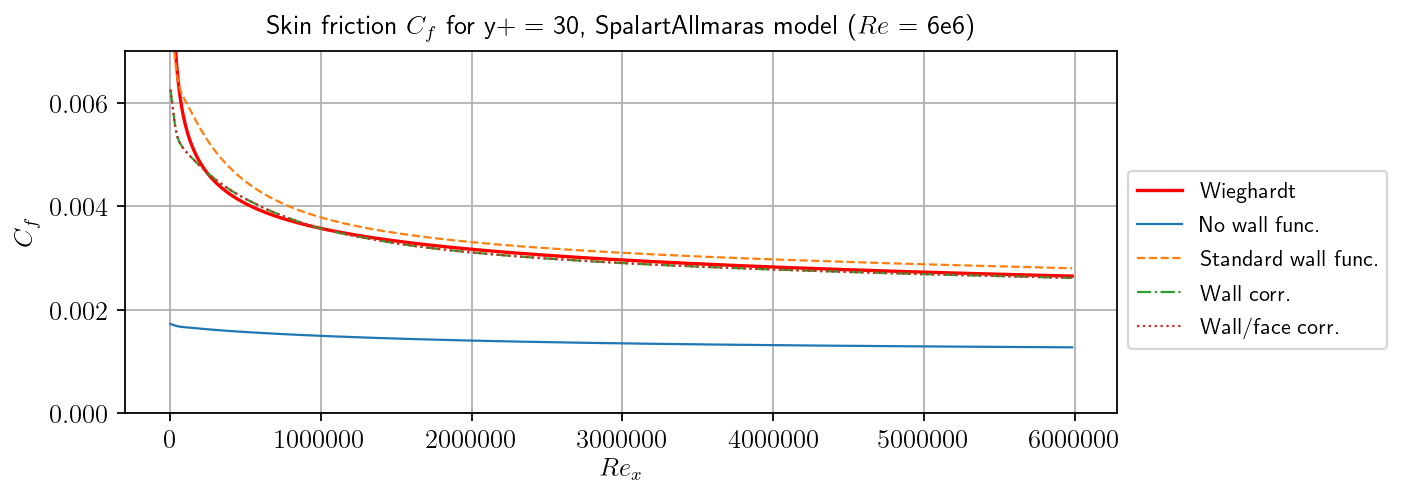

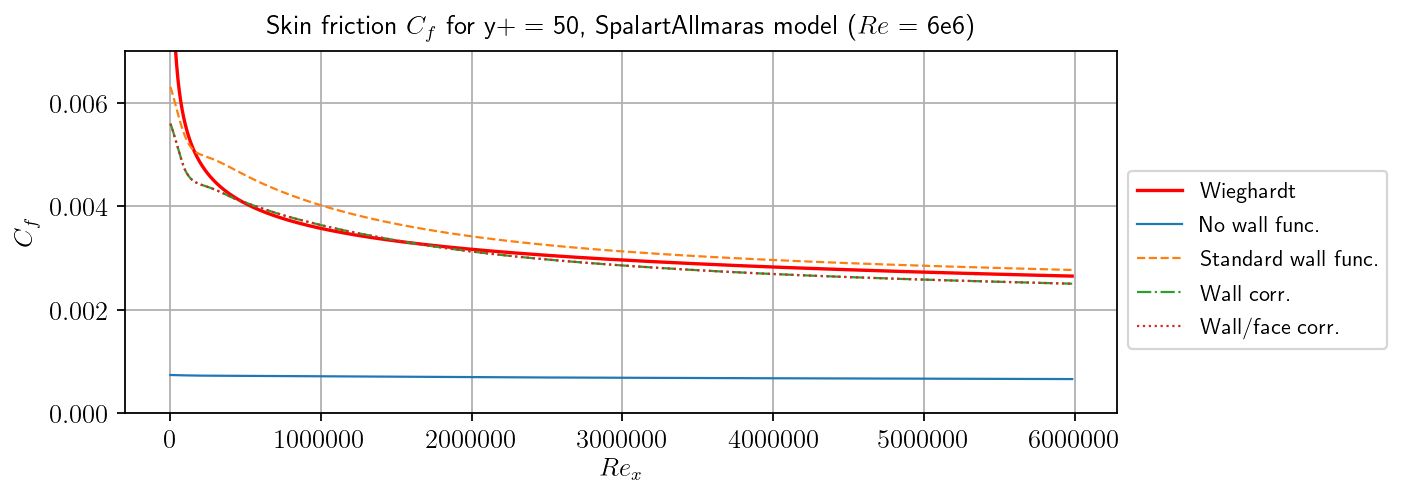

In [9]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.007])
    plt.grid()
    ax.set_xlabel(r"$Re_x$", fontsize = 12)
    ax.set_ylabel(r"$C_f$", fontsize = 12)
    ax.tick_params(labelsize = 12)
    plt.title(r"Skin friction $C_f$ for y+ = {}, {} model ($Re$ = 6e6)".format(yp[j], model_sa))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "No wall func.", ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "Standard wall func.", ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "Wall corr.", ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "Wall/face corr.", ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 10, bbox_to_anchor=(1, 0.7))
        plt.savefig("output/2DflatPlate/yp{}_Cf_Re6e6_flatplate.pdf".format(yp[j]), bbox_inches="tight")

### Comparison *Cf* of the case without wall function for different *y+*

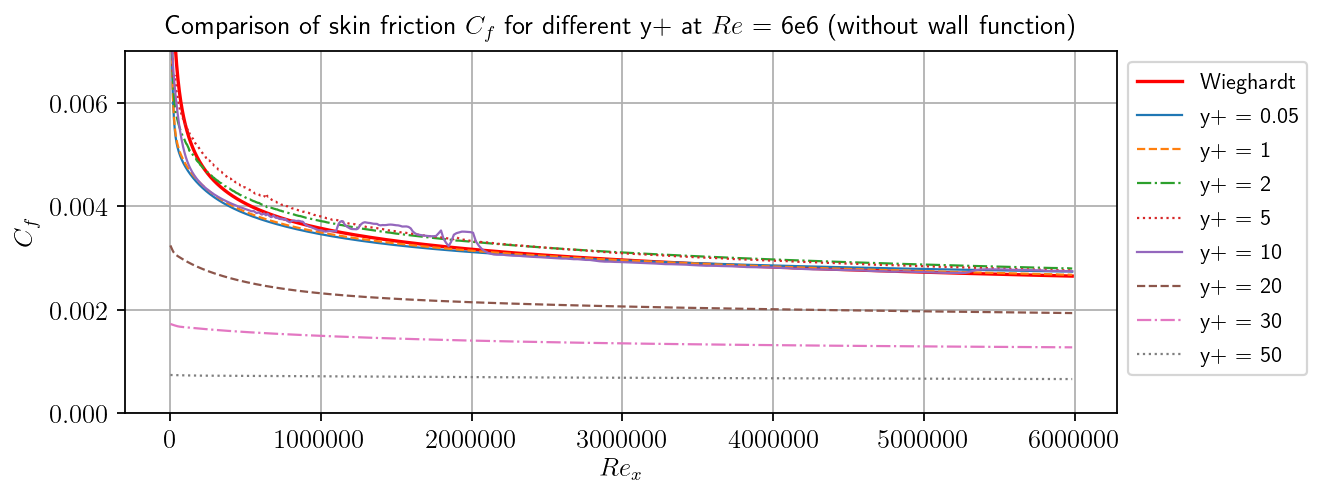

In [10]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax2.set_xlabel(r"$Re_x$", fontsize = 12)
ax2.set_ylabel(r"$C_f$", fontsize = 12)
ax2.tick_params(labelsize = 12)
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 6e6 (without wall function)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 10, bbox_to_anchor=(1, 1))
plt.savefig("output/2DflatPlate/Cf_Re6e6_flatplate_nowallfunc.pdf", bbox_inches="tight")

### Comparison *Cf* of the case with wall function for different *y+*

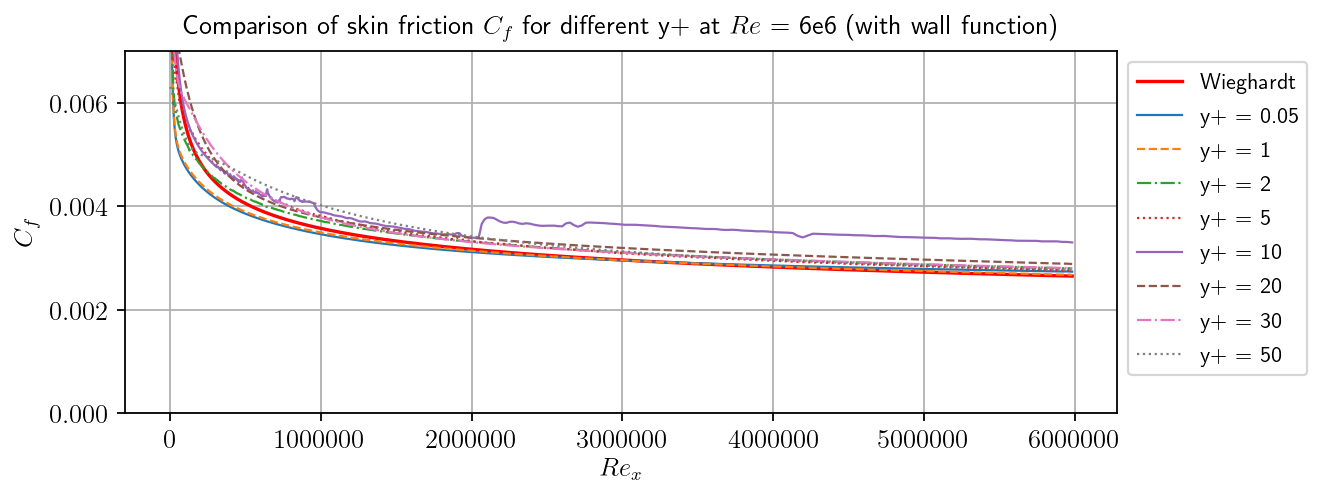

In [11]:
fig2_b, ax2_b = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax2_b.set_xlabel(r"$Re_x$", fontsize = 12)
ax2_b.set_ylabel(r"$C_f$", fontsize = 12)
ax2_b.tick_params(labelsize = 12)
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 6e6 (with wall function)")
ax2_b.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2_b.plot(Rex, Cf_wall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2_b.legend(fontsize = 10, bbox_to_anchor=(1, 1))
plt.savefig("output/2DflatPlate/Cf_Re6e6_flatplate_standardwallfunc.pdf", bbox_inches="tight")

### Comparison *Cf* of data-driven wall modeling with the correction at the wall for different *y+*

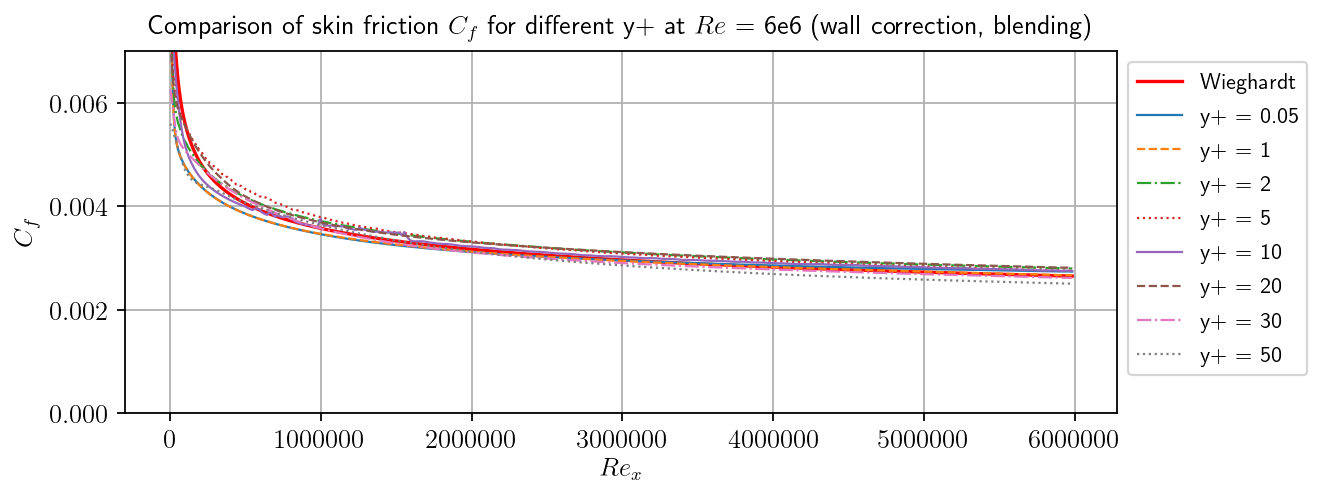

In [12]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax3.set_xlabel(r"$Re_x$", fontsize = 12)
ax3.set_ylabel(r"$C_f$", fontsize = 12)
ax3.tick_params(labelsize = 12)
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 6e6 (wall correction, blending)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 10, bbox_to_anchor=(1, 1))
plt.savefig("output/2DflatPlate/Cf_Re6e6_flatplate_wallcorr.pdf", bbox_inches="tight")

### Comparison *Cf* of data-driven wall modeling with the correction at the first face for different *y+*

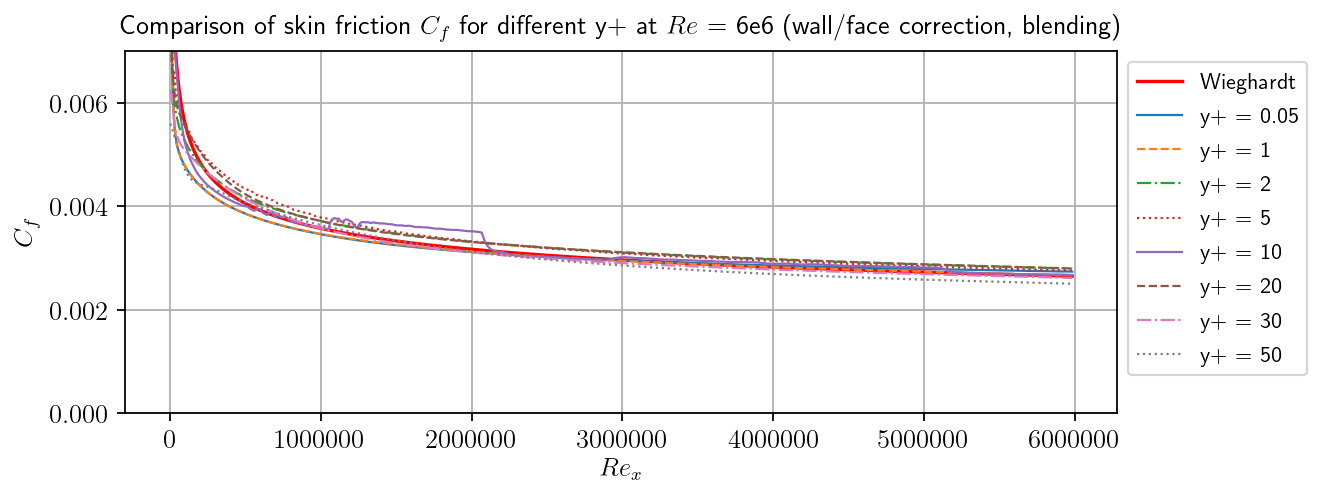

In [13]:
style4 = ["-", "--", "-.", ":"]
lw4 = 1.0
stylecycler3 = cycle(style4)

fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax4.set_xlabel(r"$Re_x$", fontsize = 12)
ax4.set_ylabel(r"$C_f$", fontsize = 12)
ax4.tick_params(labelsize = 12)
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 6e6 (wall/face correction, blending)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler3), c = "C{:d}".format(j), lw = lw4)
        ax4.legend(fontsize = 10, bbox_to_anchor=(1, 1))
plt.savefig("output/2DflatPlate/Cf_Re6e6_flatplate_facecorr.pdf", bbox_inches="tight")

### Comparison of Cf between standard wall function and data-driven wall model

In [14]:
mean_Cf_nowall = np.array([Cf_nowall[:, i].mean() for i in range(Cf_nowall.shape[1])])
mean_Cf_wall = np.array([Cf_wall[:, i].mean() for i in range(Cf_wall.shape[1])])
mean_Cf_ddwall = np.array([Cf_ddwall[:, i].mean() for i in range(Cf_ddwall.shape[1])])
mean_Cf_ddface = np.array([Cf_ddface[:, i].mean() for i in range(Cf_ddface.shape[1])])

In [15]:
std_Cf_nowall = np.array([np.std(Cf_nowall[:, i]) for i in range(Cf_nowall.shape[1])])
std_Cf_wall = np.array([np.std(Cf_wall[:, i]) for i in range(Cf_wall.shape[1])])
std_Cf_ddwall = np.array([np.std(Cf_ddwall[:, i]) for i in range(Cf_ddwall.shape[1])])
std_Cf_ddface = np.array([np.std(Cf_ddface[:, i]) for i in range(Cf_ddface.shape[1])])

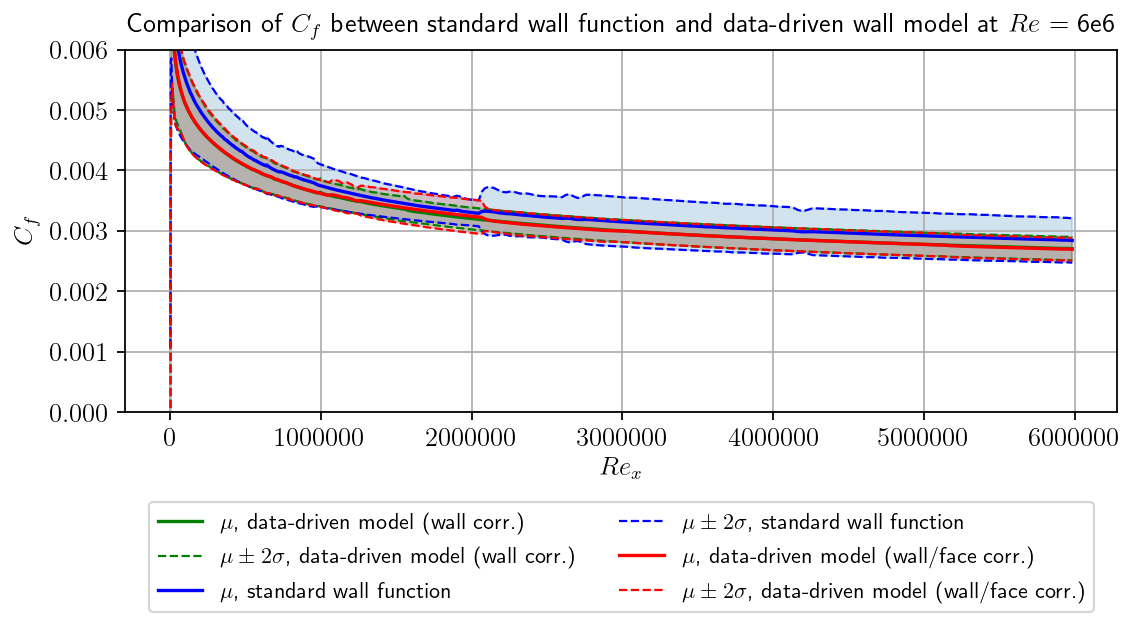

In [16]:
fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax5.set_xlabel(r"$Re_x$", fontsize = 12)
ax5.set_ylabel(r"$C_f$", fontsize = 12)
ax5.tick_params(labelsize = 12)
plt.title(r"Comparison of $C_f$ between standard wall function and data-driven wall model at $Re$ = 6e6")
ax5.plot(Rex, mean_Cf_ddwall, color = "g", label = r"$\mu$, data-driven model (wall corr.)")
ax5.plot(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, ls = style[1], c = "g", lw = lw)
ax5.plot(Rex, mean_Cf_ddwall + 2*std_Cf_ddwall, label = r"$\mu\pm 2\sigma$, data-driven model (wall corr.)", ls = style[1], c = "g", lw = lw)
plt.fill_between(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, mean_Cf_ddwall + 2*std_Cf_ddwall, color = "C{:d}".format(2), alpha=0.2)
ax5.plot(Rex, mean_Cf_wall, color = "b", label = r"$\mu$, standard wall function")
ax5.plot(Rex, mean_Cf_wall - 2*std_Cf_wall, ls = style[1], c = "b", lw = lw)
ax5.plot(Rex, mean_Cf_wall + 2*std_Cf_wall, label = r"$\mu\pm 2\sigma$, standard wall function", ls = style[1], c = "b", lw = lw)
plt.fill_between(Rex, mean_Cf_wall - 2*std_Cf_wall, mean_Cf_wall + 2*std_Cf_wall, color = "C{:d}".format(0), alpha=0.2)
ax5.plot(Rex, mean_Cf_ddface, color = "r", label = r"$\mu$, data-driven model (wall/face corr.)")
ax5.plot(Rex, mean_Cf_ddface - 2*std_Cf_ddface, ls = style[1], c = "r", lw = lw)
ax5.plot(Rex, mean_Cf_ddface + 2*std_Cf_ddface, label = r"$\mu\pm 2\sigma$, data-driven model (wall/face corr.)", ls = style[1], c = "r", lw = lw)
plt.fill_between(Rex, mean_Cf_ddface - 2*std_Cf_ddface, mean_Cf_ddface + 2*std_Cf_ddface, color = "C{:d}".format(3), alpha=0.2)
ax5.legend(ncol=2, fontsize = 10, bbox_to_anchor=(0.5, -0.4), loc='center')
plt.savefig("output/2DflatPlate/Cf_Re6e6_flatplate_stdev.pdf", bbox_inches="tight")

In [17]:
repValue_Cf_nowall = mean_Cf_nowall.mean()
repValue_Cf_wall = mean_Cf_wall.mean()
repValue_Cf_ddwall = mean_Cf_ddwall.mean()
repValue_Cf_ddface = mean_Cf_ddface.mean()

repStd_Cf_nowall = std_Cf_nowall.mean()
repStd_Cf_wall = std_Cf_wall.mean()
repStd_Cf_ddwall = std_Cf_ddwall.mean()
repStd_Cf_ddface = std_Cf_ddface.mean()

In [18]:
# Representative mean value with 95% credible interval
print("Mean +- 2*std = {:.6f} +- {:.6f} (No wall func.)".format(repValue_Cf_nowall, 2*repStd_Cf_nowall))
print("Mean +- 2*std = {:.6f} +- {:.6f} (Standard wall func.)".format(repValue_Cf_wall, 2*repStd_Cf_wall))
print("Mean +- 2*std = {:.6f} +- {:.6f} (Wall corr.)".format(repValue_Cf_ddwall, 2*repStd_Cf_ddwall))
print("Mean +- 2*std = {:.6f} +- {:.6f} (Wall/face corr.)".format(repValue_Cf_ddface, 2*repStd_Cf_ddface))

Mean +- 2*std = 0.002975 +- 0.002417 (No wall func.)
Mean +- 2*std = 0.004030 +- 0.000572 (Standard wall func.)
Mean +- 2*std = 0.003826 +- 0.000368 (Wall corr.)
Mean +- 2*std = 0.003832 +- 0.000387 (Wall/face corr.)
